In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("D:/Data_analysis_internship/HR analysis data.csv")

C:\Users\Rudra\AppData\Local\Temp\ipykernel_15960\3079937254.py:1: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("D:/Data_analysis_internship/HR analysis data.csv")


In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23424 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  object 
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  object 
 9   EmployeeNumber            23435 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  object 
 14  JobInv

In [6]:
# Convert MonthlyIncome to float safely
df['MonthlyIncome'] = df['MonthlyIncome'].str.replace(',', '', regex=False).str.strip()
df['MonthlyIncome'] = pd.to_numeric(df['MonthlyIncome'], errors='coerce')


In [7]:
df["MonthlyIncome"].dtype

dtype('float64')

In [8]:
df.shape

(23436, 37)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23433.0,36.936671,9.137432,18.0,30.0,36.0,43.0,60.0
DailyRate,23424.0,801.828765,403.206166,102.0,465.0,802.0,1157.0,1499.0
Education,23424.0,2.910050,1.024931,1.0,2.0,3.0,4.0,6.0
EnvironmentSatisfaction,23427.0,13.681777,1186.544372,1.0,2.0,3.0,4.0,129588.0
JobInvolvement,23427.0,2.733811,0.836860,1.0,2.0,3.0,3.0,54.0
JobLevel,23429.0,2.064023,1.105421,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,23421.0,6504.978908,4704.175800,1009.0,2911.0,4936.0,8380.0,19999.0
MonthlyRate,23425.0,14304.343821,7102.636293,2094.0,8053.0,14222.0,20460.0,26999.0
NumCompaniesWorked,23427.0,3.887779,155.332904,0.0,1.0,2.0,4.0,23258.0
PerformanceRating,23426.0,3.155852,0.371215,3.0,3.0,3.0,3.0,13.0


In [10]:
df.isnull().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               15
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [11]:
# In our Data Null Values are very less so we drop it
df=df.dropna()

In [12]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
Application ID              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

In [14]:
# Export cleaned data
df.reset_index(drop=True, inplace=True)
df.to_csv('D:/project_data/HR analytic clean_data.csv', index=False)

## exploratory Data Analysis

In [13]:
df["Gender"].value_counts()

Male      13914
Female     9290
Name: Gender, dtype: int64

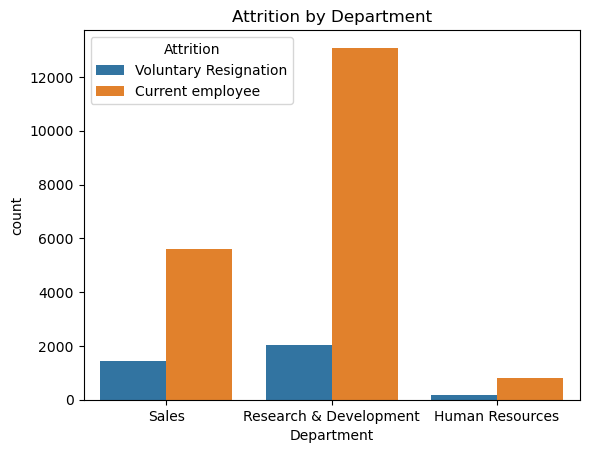

In [14]:
#Attrition by Department
sns.countplot(x="Department",hue="Attrition",data=df)
plt.title("Attrition by Department")
plt.show()

<Axes: xlabel='MonthlyIncome', ylabel='count'>

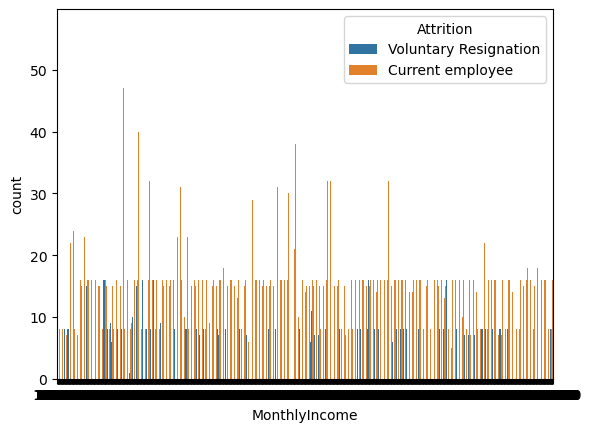

In [15]:
sns.countplot(x="MonthlyIncome",hue="Attrition",data=df)

<Axes: xlabel='Age', ylabel='Count'>

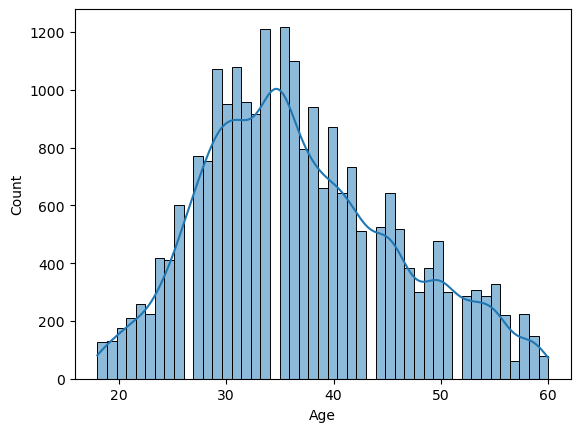

In [16]:
sns.histplot(df['Age'], kde=True)

C:\Users\Rudra\AppData\Local\Temp\ipykernel_14140\3824583667.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= df.corr()


<Axes: >

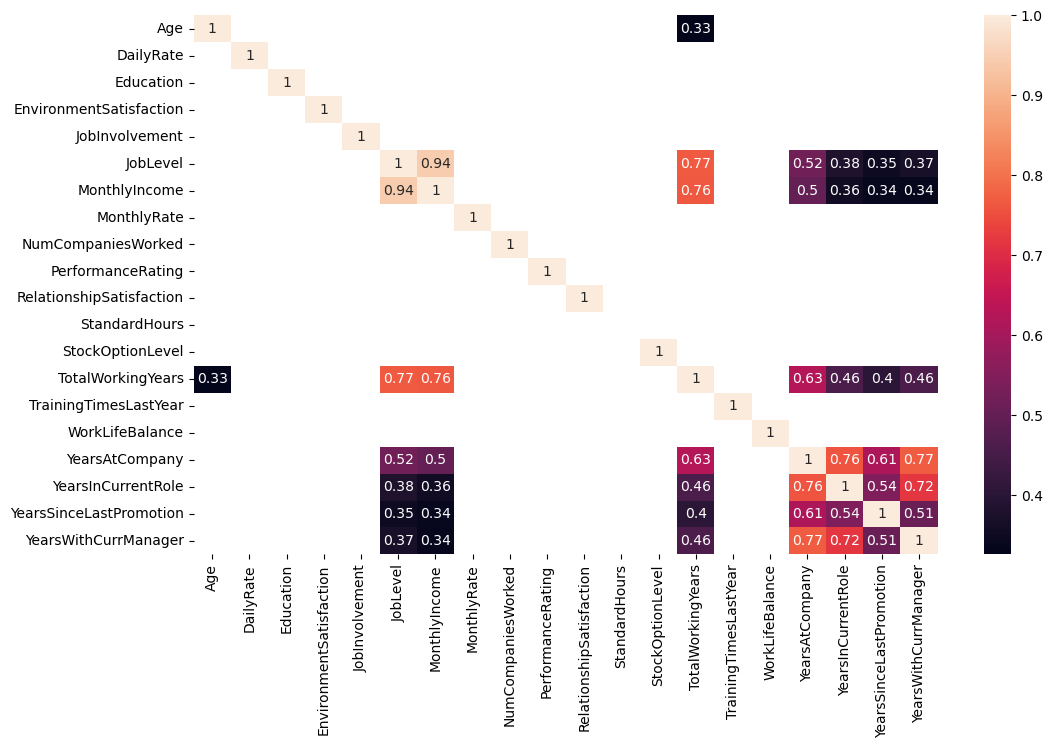

In [17]:
corr= df.corr()
plt.subplots(figsize=[12,7])
sns.heatmap(corr,annot=True,mask=corr <0.3)

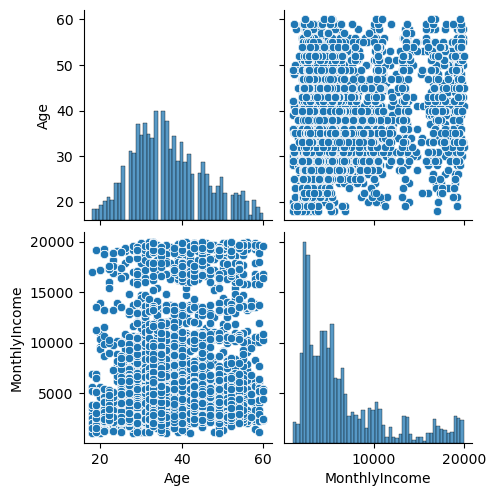

In [18]:
sns.pairplot(df[['Age', 'MonthlyIncome', 'Attrition']])

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

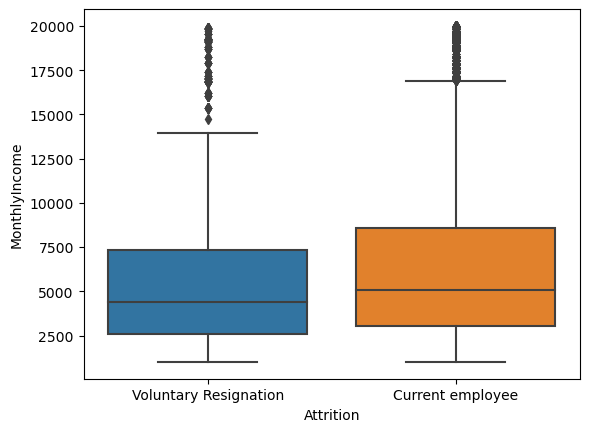

In [19]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Technical Degree'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Human Resources'),
  Text(6, 0, 'Test')])

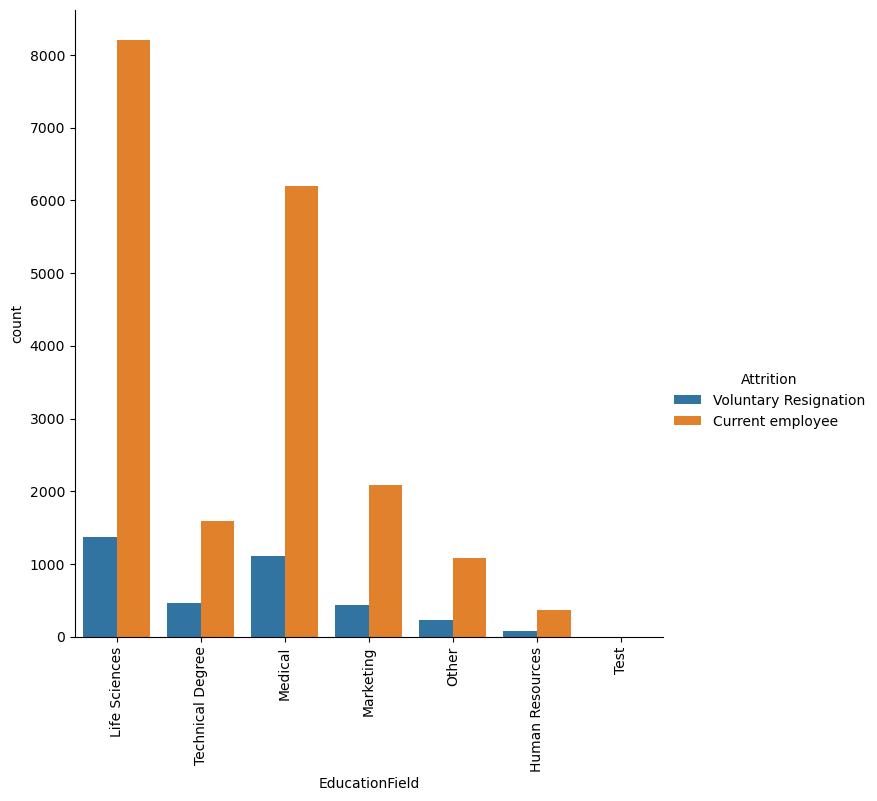

In [20]:
sns.catplot(x='EducationField',hue='Attrition',kind='count',data=df,height=7)
plt.xticks(rotation=90)

<Axes: xlabel='Gender', ylabel='count'>

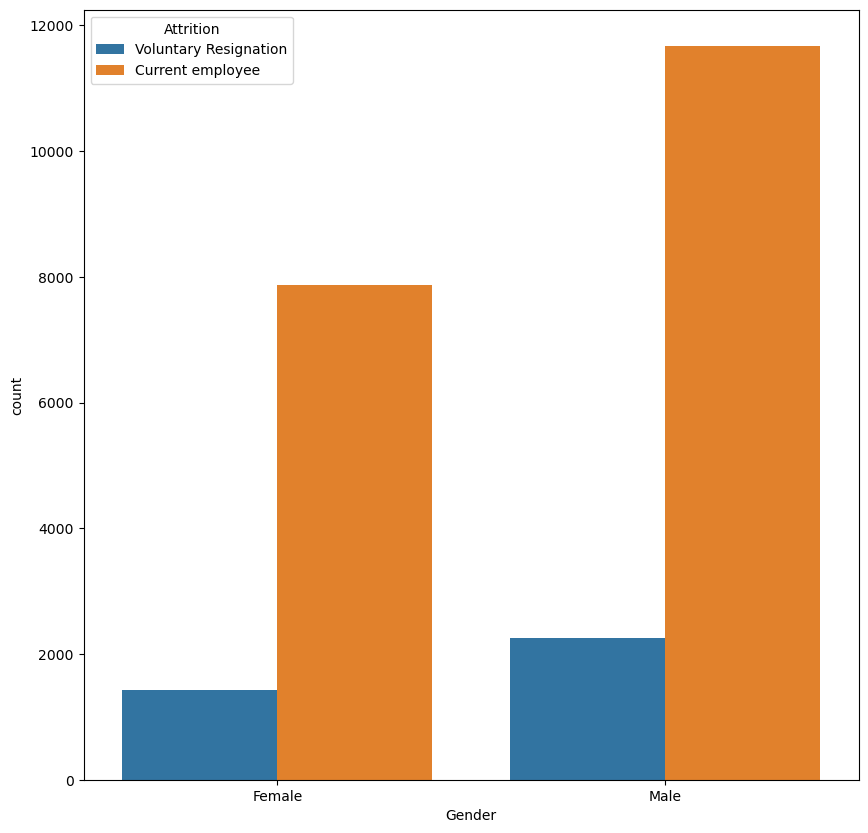

In [21]:
plt.figure(figsize=[10,10])
plt.xticks(rotation=0)
sns.countplot(x="Gender",hue="Attrition",data= df)

In [22]:
#To check if your data is balanced or imbalanced, especially for a classification problem like predicting Attrition
print(df['Attrition'].value_counts())

print(df['Attrition'].value_counts(normalize=True) * 100)

Current employee         19530
Voluntary Resignation     3674
Name: Attrition, dtype: int64
Current employee         84.166523
Voluntary Resignation    15.833477
Name: Attrition, dtype: float64


In [23]:
# Data is Imbalance
# Desion tree or Random forest handles imbalance better than logistic regression

## Encoding

In [24]:
# bivarite encoding
df.Attrition=df.Attrition.apply(lambda x: 1 if x=='Voluntary Resignation' else 0)
df.Attrition.value_counts()

0    19530
1     3674
Name: Attrition, dtype: int64

In [25]:
df.Gender=df.Gender.apply(lambda x: 1 if x=='Male' else 0)
df.Gender.value_counts()

1    13914
0     9290
Name: Gender, dtype: int64

In [26]:
df.Over18=df.Over18.apply(lambda x: 1 if x=='Y' else 0)
df.Over18.value_counts()

1    23204
Name: Over18, dtype: int64

In [27]:
df.OverTime=df.OverTime.apply(lambda x: 1 if x=='Yes' else 0)
df.OverTime.value_counts()

0    16633
1     6571
Name: OverTime, dtype: int64

In [28]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [29]:
# one-hot Encoding
cols_to_encode = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# Fill missing values in those columns to prevent issues
for col in cols_to_encode:
    df[col] = df[col].fillna('Unknown')

# Encode all at once
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

In [30]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41.0,1,1102.0,1,2.0,1,1,123456,2.0,0,...,0,0,0,0,0,0,1,0,0,1
1,41.0,1,1102.0,1,2.0,1,1,123458,2.0,0,...,0,0,0,0,0,0,1,0,0,1
2,41.0,1,1102.0,1,2.0,1,7,123462,2.0,0,...,0,0,0,0,0,0,1,0,0,1
3,41.0,1,1102.0,1,2.0,1,8,123463,2.0,0,...,0,0,0,0,0,0,1,0,0,1
4,41.0,1,1102.0,1,2.0,1,9,123464,2.0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,60.0,0,370.0,1.0,4.0,1,19337,142792.0,3.0,1,...,0,0,0,0,0,0,0,0,0,0
23429,60.0,0,370.0,1.0,4.0,1,19338,142793.0,3.0,1,...,0,0,0,0,0,0,0,0,0,0
23430,60.0,0,370.0,1.0,4.0,1,19340,142795.0,3.0,1,...,0,0,0,0,0,0,0,0,0,0
23431,60.0,0,370.0,1.0,4.0,1,19344,142799.0,3.0,1,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df=df.drop("EmployeeNumber",axis=1)

In [32]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41.0,1,1102.0,1,2.0,1,123456,2.0,0,94,...,0,0,0,0,0,0,1,0,0,1
1,41.0,1,1102.0,1,2.0,1,123458,2.0,0,94,...,0,0,0,0,0,0,1,0,0,1
2,41.0,1,1102.0,1,2.0,1,123462,2.0,0,94,...,0,0,0,0,0,0,1,0,0,1
3,41.0,1,1102.0,1,2.0,1,123463,2.0,0,94,...,0,0,0,0,0,0,1,0,0,1
4,41.0,1,1102.0,1,2.0,1,123464,2.0,0,94,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,60.0,0,370.0,1.0,4.0,1,142792.0,3.0,1,92,...,0,0,0,0,0,0,0,0,0,0
23429,60.0,0,370.0,1.0,4.0,1,142793.0,3.0,1,92,...,0,0,0,0,0,0,0,0,0,0
23430,60.0,0,370.0,1.0,4.0,1,142795.0,3.0,1,92,...,0,0,0,0,0,0,0,0,0,0
23431,60.0,0,370.0,1.0,4.0,1,142799.0,3.0,1,92,...,0,0,0,0,0,0,0,0,0,1


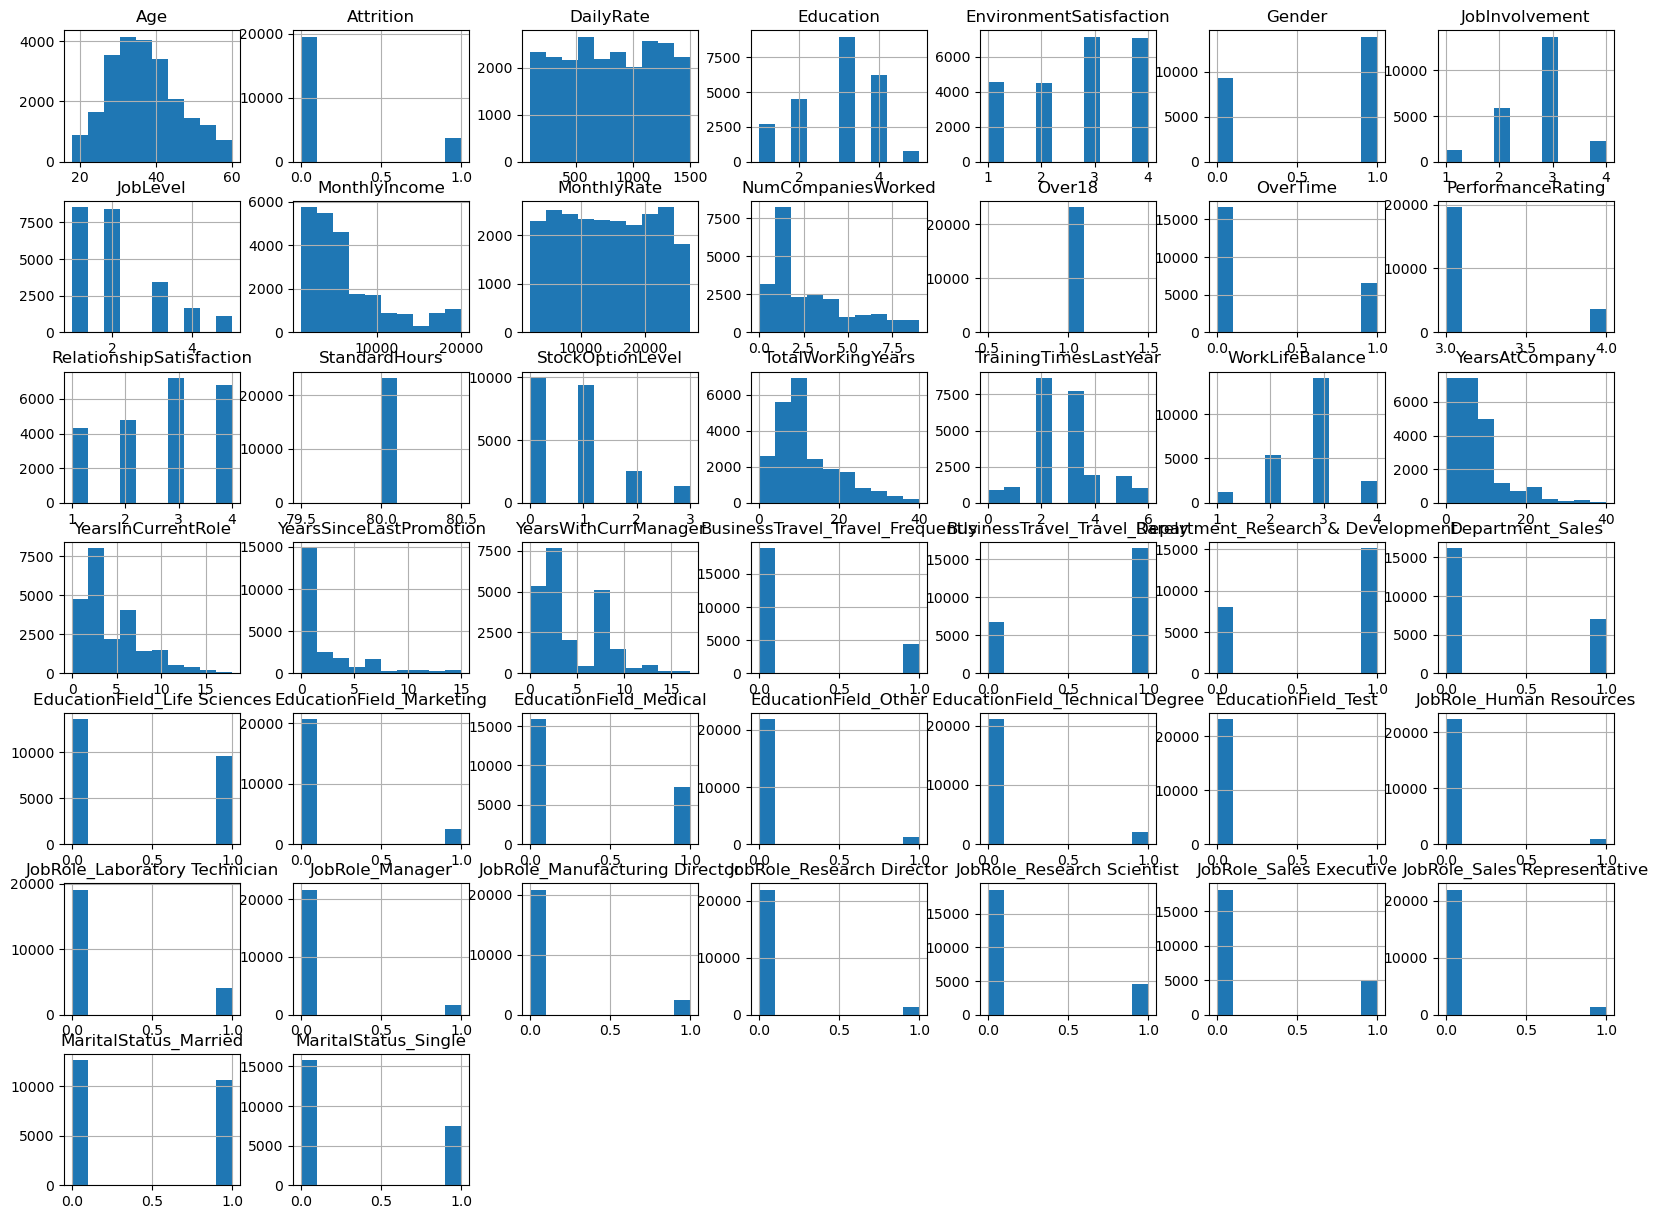

In [33]:
df.hist(figsize=(20,15))
plt.show()

In [34]:
df=df.drop(["Over18","EmployeeCount","StandardHours"],axis=1)

In [35]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41.0,1,1102.0,1,2.0,123456,2.0,0,94,3.0,...,0,0,0,0,0,0,1,0,0,1
1,41.0,1,1102.0,1,2.0,123458,2.0,0,94,3.0,...,0,0,0,0,0,0,1,0,0,1
2,41.0,1,1102.0,1,2.0,123462,2.0,0,94,3.0,...,0,0,0,0,0,0,1,0,0,1
3,41.0,1,1102.0,1,2.0,123463,2.0,0,94,3.0,...,0,0,0,0,0,0,1,0,0,1
4,41.0,1,1102.0,1,2.0,123464,2.0,0,94,3.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,60.0,0,370.0,1.0,4.0,142792.0,3.0,1,92,1.0,...,0,0,0,0,0,0,0,0,0,0
23429,60.0,0,370.0,1.0,4.0,142793.0,3.0,1,92,1.0,...,0,0,0,0,0,0,0,0,0,0
23430,60.0,0,370.0,1.0,4.0,142795.0,3.0,1,92,1.0,...,0,0,0,0,0,0,0,0,0,0
23431,60.0,0,370.0,1.0,4.0,142799.0,3.0,1,92,1.0,...,0,0,0,0,0,0,0,0,0,1


## Model Training

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [40]:
x,y=df.drop("Attrition",axis=1),df["Attrition"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [42]:
import numpy as np

# Replace placeholder values
x_train.replace('?????', np.nan, inplace=True)
x_test.replace('?????', np.nan, inplace=True)

# Optional: convert all to numeric
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_test = x_test.apply(pd.to_numeric, errors='coerce')


In [43]:
from sklearn.impute import SimpleImputer

# Create an imputer to fill NaN with the median (good for numeric data)
imputer = SimpleImputer(strategy='median')

# Fit on training data and transform both train and test
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


In [44]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_jobs=-1, random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [45]:
model.score(x_test,y_test)

0.997845291962939

In [47]:
model.feature_importances_

array([0.09304975, 0.07626403, 0.05753498, 0.02778631, 0.05865607,
       0.02479504, 0.00944973, 0.05968316, 0.01979269, 0.01610795,
       0.02274547, 0.05891514, 0.04606305, 0.01470609, 0.02067473,
       0.03458134, 0.00195177, 0.02186919, 0.0191827 , 0.03971371,
       0.02591785, 0.01822567, 0.03265264, 0.02527264, 0.02445215,
       0.0269854 , 0.01597439, 0.0097958 , 0.01082733, 0.01093812,
       0.00458512, 0.00337863, 0.00479607, 0.00213406, 0.00411073,
       0.        , 0.00316596, 0.007552  , 0.00208319, 0.00478073,
       0.00227121, 0.00586459, 0.00749777, 0.00502457, 0.0069188 ,
       0.01127171])